# Исследование данных сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1. без подписки:
   - абонентская плата отсутствует
   - стоимость одной минуты поездки — 8 рублей
   - стоимость старта (начала поездки) — 50 рублей
   
2. с подпиской Ultra:
   - абонентская плата — 199 рублей в месяц
   - стоимость одной минуты поездки — 6 рублей
   - стоимость старта — бесплатно

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — users_go.csv

| Название столбца  | Описание |
|:------------- |:------------- |
| user_id  | уникальный идентификатор пользователя  |
| name  | имя пользователя  |
| age  | возраст  |
| city  | город  |
| subscription_type  | тип подписки (free, ultra)  |

**Поездки** — rides_go.csv

| Название столбца  | Описание |
|:------------- |:------------- |
| user_id  | уникальный идентификатор пользователя  |
| distance  | расстояние, которое пользователь проехал в текущей сессии (в метрах)  |
| duration  | продолжительность сессии (в минутах)  |
| date  | дата совершения поездки  |

**Подписки** — subscriptions_go.csv
	
| Название столбца  | Описание |
|:------------- |:------------- |
| subscription_type  | тип подписки  |
| minute_price  | стоимость одной минуты поездки по данной подписке  |
| start_ride_price  | стоимость начала поездки  |
| subscription_fee  | стоимость ежемесячного платежа  |

**Шаг 1. Загрузка данных**
* 1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

 - /datasets/users_go.csv
 - /datasets/rides_go.csv
 - /datasets/subscriptions_go.csv
 
* 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

**Шаг 2. Предобработка данных**
 - 2.1 Приведите столбец date к типу даты pandas.
 - 2.2 Создайте новый столбец с номером месяца на основе столбца date.
 - 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
 
**Шаг 3. Исследовательский анализ данных**

Опишите и визуализируйте общую информацию о пользователях и поездках:

 - 3.1 частота встречаемости городов;
 - 3.2 соотношение пользователей с подпиской и без подписки;
 - 3.3 возраст пользователей;
 - 3.4 расстояние, которое пользователь преодолел за одну поездку;
 - 3.5 продолжительность поездок.
 
**Шаг 4. Объединение данных**

 - 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
 - 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
   * c данными о пользователях без подписки;
   * с данными о пользователях с подпиской.
 - 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.
 
**Шаг 5. Подсчёт выручки**
 - 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
 - 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.
 
**Шаг 6. Проверка гипотез**

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

 - 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
 - 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
 - 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
 - 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
 
**Шаг 7 (необязательное задание). Распределения**
 - 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

 - 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
display(users_go.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
display(rides_go.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
display(subscriptions_go.head())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Мы имеем почти 20000 строк датасета. На первом же этапе, при открытии датасета, сразу же исправляем тип данных с датой.

#### Шаг 2. Предобработка данных

In [8]:
rides_go['month'] = rides_go['date'].astype('datetime64[M]')
display(rides_go.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,2021-01-01
1,1,2617.592153,15.816871,2021-01-18,2021-01-01
2,1,754.159807,6.232113,2021-04-20,2021-04-01
3,1,2694.783254,18.511000,2021-08-11,2021-08-01
4,1,4028.687306,26.265803,2021-08-28,2021-08-01


In [9]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [11]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [12]:
rides_go.duplicated().sum()

0

In [13]:
users_go.duplicated().sum()

31

In [14]:
subscriptions_go.duplicated().sum()

0

In [15]:
users_go = users_go.drop_duplicates()

In [16]:
users_go.duplicated().sum()

0

В процессе предобработке данных:

1. Создан новый столбец с номером месяца на основе столбца date.
2. Пропусков в датасетах не было обнаружено.
3. Дубликаты были удалены.

#### Шаг 3. Исследовательский анализ данных

In [17]:
users_go['city'].value_counts().head(20)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Всего имеется 8 уникальных значений по городам.

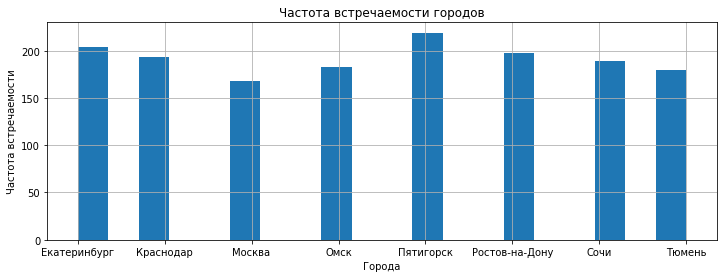

In [18]:
users_go['city'].sort_values().hist(bins=20, figsize=(12, 4));
plt.title('Частота встречаемости городов');
plt.xlabel('Города')
plt.ylabel('Частота встречаемости')
plt.show()

Чаще всего встречается Пятигорск, а реже всего Москва.

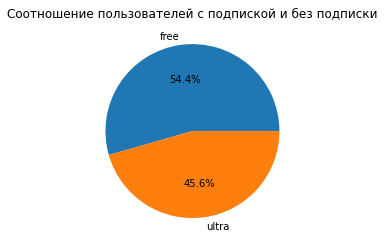

In [19]:
users_go['subscription_type'].value_counts().plot.pie(figsize=(4, 4), autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

Пользователей без подписки больше, чем пользователей с подпиской.

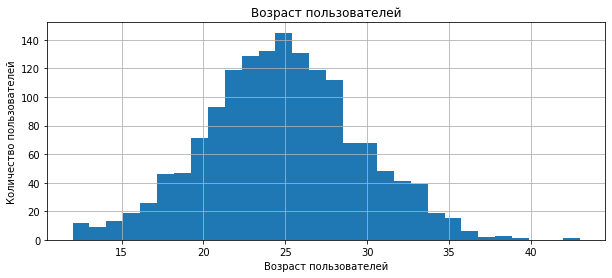

In [20]:
users_go['age'].hist(bins=30, figsize=(10, 4));
plt.title('Возраст пользователей');
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.show()

Чаще всего пользуются пользователи, в возрасте 25 лет.

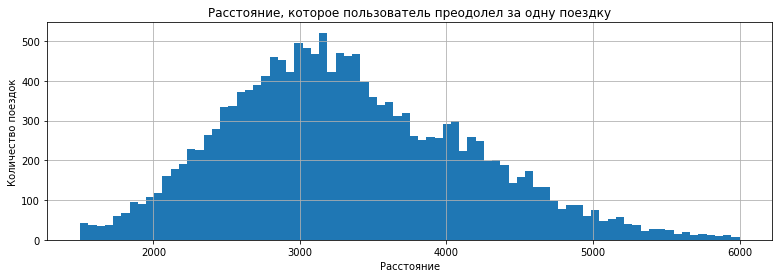

In [21]:
rides_go['distance'].hist(bins=80, range=(1500, 6000), figsize=(13, 4));
plt.title('Расстояние, которое пользователь преодолел за одну поездку');
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

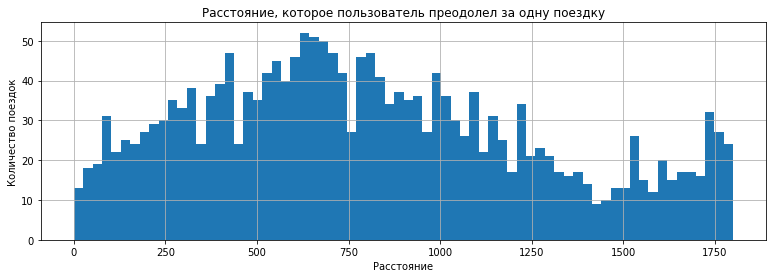

In [22]:
rides_go['distance'].hist(bins=70, range=(0, 1800), figsize=(13, 4));
plt.title('Расстояние, которое пользователь преодолел за одну поездку');
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

Пик коротких поездок находиться около 700 м. Пик длинных поездок находиться около 3000 м.

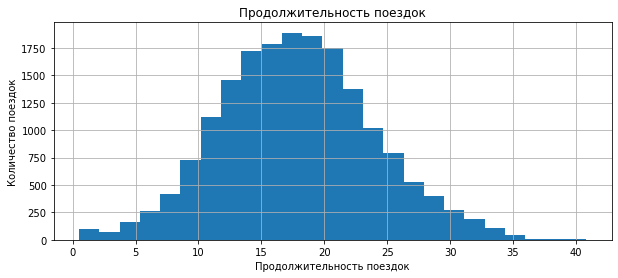

In [23]:
rides_go['duration'].hist(bins=25, figsize=(10, 4));
plt.title('Продолжительность поездок');
plt.xlabel('Продолжительность поездок')
plt.ylabel('Количество поездок')
plt.show()

Чаще всего продолжительность поездки составляет около 17 минут.

**Вывод**

Всего имеется 8 уникальных значений по городам. Чаще всего встречается Пятигорск, а реже всего Москва. Пользователей без подписки больше, чем пользователей с подпиской. Чаще всего пользуются пользователи, в возрасте 25 лет. Пик коротких поездок находиться около 700 м. Пик длинных поездок находиться около 3000 м. Чаще всего продолжительность поездки составляет около 17 минут.

#### Шаг 4. Объединение данных

In [24]:
merged_df = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  datetime64[ns]
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 1.8+ MB


In [26]:
merged_df.duplicated().sum()

0

In [27]:
merged_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [28]:
print("Размерность датасета users_go:", users_go.shape)

print("Размерность датасета rides_go:", rides_go.shape)

print("Размерность датасета subscriptions_go:", subscriptions_go.shape)

print("Размерность датасета rides_go после добавления столбца с месяцем:", rides_go.shape)

print("Размерность объединенного датасета:", merged_df.shape)

Размерность датасета users_go: (1534, 5)
Размерность датасета rides_go: (18068, 5)
Размерность датасета subscriptions_go: (2, 4)
Размерность датасета rides_go после добавления столбца с месяцем: (18068, 5)
Размерность объединенного датасета: (18068, 12)


In [29]:
free = merged_df[merged_df['subscription_fee'] == 0]
ultra = merged_df[merged_df['subscription_fee'] == 199]

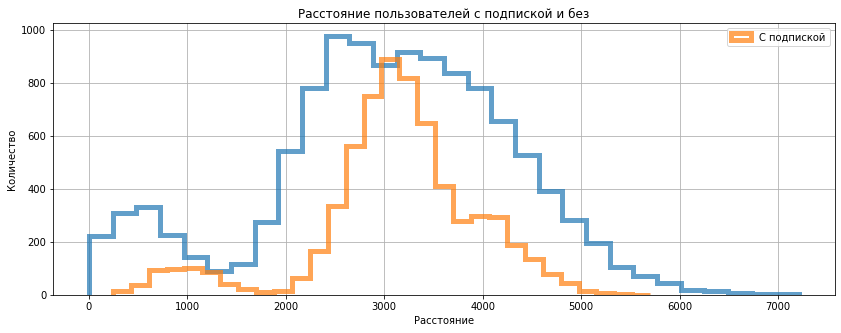

In [30]:
ax = free['distance'].plot(
    kind='hist',
    histtype='step',
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='Без подписки',
)
ultra['distance'].plot(
    kind='hist',
    histtype='step',
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(14, 5)
) 
plt.title('Расстояние пользователей с подпиской и без');
plt.xlabel('Расстояние'),
plt.ylabel('Количество')
plt.show()

Пользователи без подписки, чаще всего проезжают около 2500 м., а c подпиской, около 3000 м.

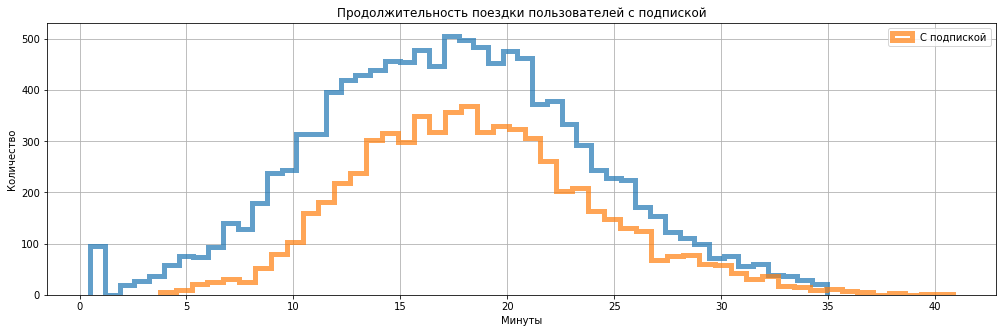

In [31]:
ax = free['duration'].plot(
    kind='hist',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Без подписки',
)
ultra['duration'].plot(
    kind='hist',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(17, 5)
) 
plt.title('Продолжительность поездки пользователей с подпиской');
plt.xlabel('Минуты'),
plt.ylabel('Количество')
plt.show()

Пользователи без подписки, чаще всего едут около 18 минут. С подпиской, так же, чаще всего едут около 18 минут.

1. Объединили 3 датафрейма в один. 
2. Создали ещё два датафрейма из общего датафрейма:
   - c данными о пользователях без подписки;
   - с данными о пользователях с подпиской.
3. Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

#### Шаг 5. Подсчёт выручки

In [32]:
merged_df['duration'] = np.ceil(merged_df['duration'])
agg_df = merged_df.groupby(['user_id', merged_df['date'].dt.month]).agg({'distance':'sum', 'duration':['sum', 'count'],
                                  'subscription_type':'first',
                                  'minute_price':'first',
                                  'start_ride_price':'first',
                                  'subscription_fee':'first'}).reset_index()

In [33]:
agg_df.columns = ['user_id', 'date', 'sum_distance', 'sum_duration', 'count_rides',
                         'subscription_type', 'minute_price',
                         'start_ride_price', 'subscription_fee']
agg_df.reset_index(inplace=True)
agg_df

,index,user_id,date,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,1,4,754.159807,7.0,1,ultra,6,0,199
2,2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,4,1,11,7003.499363,56.0,3,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...
11326,11326,1534,6,3409.468534,26.0,2,free,8,50,0
11327,11327,1534,8,7622.453034,48.0,2,free,8,50,0
11328,11328,1534,9,4928.173852,23.0,1,free,8,50,0
11329,11329,1534,11,13350.015305,78.0,4,free,8,50,0


Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [34]:
agg_df['monthly_revenue'] = (agg_df['start_ride_price'] * agg_df['count_rides'] +
                             agg_df['minute_price'] * agg_df['sum_duration'] +
                             agg_df['subscription_fee'])
agg_df

,index,user_id,date,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...,...
11326,11326,1534,6,3409.468534,26.0,2,free,8,50,0,308.0
11327,11327,1534,8,7622.453034,48.0,2,free,8,50,0,484.0
11328,11328,1534,9,4928.173852,23.0,1,free,8,50,0,234.0
11329,11329,1534,11,13350.015305,78.0,4,free,8,50,0,824.0


Создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Рассчитали помесячную выручку.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

 - Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое.
 - Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки.

In [35]:
free_duration = free['duration']
ultra_duration = ultra['duration']

alpha = 0.05

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [36]:
print(free['duration'].mean())
print(ultra['duration'].mean())

17.39090929866399
18.54198516280583


6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

 - Нулевая гипотеза (Н0): Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.
 - Альтернативная гипотеза (Н1): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

In [37]:
one_trip = 3130
ultra_dist = ultra['distance']

alpha = 0.05

results = st.ttest_1samp(ultra_dist, one_trip, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [38]:
ultra['distance'].mean()

3115.4453880370247

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

 - Нулевая гипотеза (Н0): Месячная выручка от пользователей с подпиской такая же как у пользователей без подписки.
 - Альтернативная гипотеза (Н1): Месячная выручка от пользователей с подпиской не равна месячной выручке у пользователей без подписки.

In [39]:
mrevenue_ult = agg_df[agg_df['subscription_fee'] == 199]['monthly_revenue']
mrevenue_free = agg_df[agg_df['subscription_fee'] == 0]['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(mrevenue_ult, mrevenue_free, alternative= 'greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [40]:
print(mrevenue_ult.mean())
print(mrevenue_free.mean())

362.7921906022502
328.6413651073845


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы о том, что обновление серверов привело к уменьшению количества обращений в техподдержку, необходимо использовать односторонний тест для зависимых (парных) выборок. Так как нас интересует только уменьшение количества обращений после обновления, то альтернативная гипотеза будет утверждать, что количество обращений после обновления меньше, чем до обновления. Основная (нулевая) гипотеза же может утверждать, что различия между количеством обращений до и после обновления отсутствуют или что количество обращений после обновления больше или равно, чем до. Для этого мы можем использовать односторонний тест scipy.stats.ttest_rel, указав альтернативу 'less'.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Подсказка
Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.

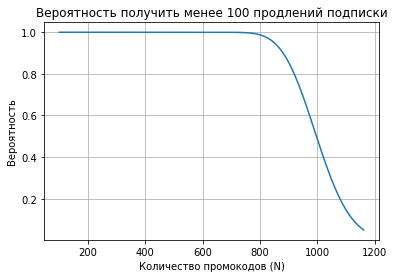

Минимальное количество промокодов (N): 1161


In [41]:
p = 0.1  # Вероятность успеха
target_prob = 0.05  # Целевая вероятность не выполнить план

N = 100  # Начальное значение N
step = 1  # Шаг изменения N
prob_less_than_target = []

while True:
    binom_dist = st.binom(N, p)
    prob = binom_dist.cdf(99)  # Вероятность получить 99 или меньше успехов
    prob_less_than_target.append(prob)

    if prob <= target_prob:
        break

    N += step

# Построение графика распределения
N_values = range(100, N+1, step)
plt.plot(N_values, prob_less_than_target)
plt.xlabel('Количество промокодов (N)')
plt.ylabel('Вероятность')
plt.title('Вероятность получить менее 100 продлений подписки')
plt.grid(True)
plt.show()

print('Минимальное количество промокодов (N):', N)

Нужно разослать минимум 1161 промокодов, чтобы вероятность не выполнить план была примерно 5 %.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

0.15371708296369768


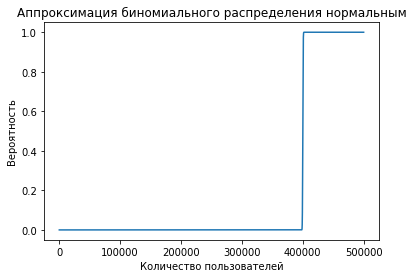

In [42]:
n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

result = distr.cdf(399500)
print(result)

x = np.arange(0, 500000)
y = st.norm.cdf(x, mu, sigma)

plt.plot(x, y)
plt.xlabel('Количество пользователей')
plt.ylabel('Вероятность')
plt.title('Аппроксимация биномиального распределения нормальным')
plt.show()

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составляет чуть больше 15%.

## Общий вывод

На начальном этапе, я работал с данными, которые составляли почти 20000 строк датасета. На первом же этапе, при открытии датасета, сразу же исправляем тип данных с датой.

В процессе предобработке данных:

1. Создан новый столбец с номером месяца на основе столбца date.
2. Пропусков в датасетах не было обнаружено.
3. Дубликаты были удалены.

На этапе исследовательского анализа данных было выяснено, что:

1. Всего имеется 8 уникальных значений по городам.
2. Чаще всего встречается Пятигорск, а реже всего Москва.
3. Пользователей без подписки больше, чем пользователей с подпиской.
4. Чаще всего пользуются пользователи, в возрасте 25 лет.
5. Пик коротких поездок находиться около 700 м. Пик длинных поездок находиться около 3000 м.
6. Чаще всего продолжительность поездки составляет около 17 минут.

На этапе объеденения данных, было выяснено, что:

1. Пользователи без подписки, чаще всего проезжают около 2500 м., а c подпиской, около 3000 м.
2. Пользователи без подписки, чаще всего едут около 18 минут. С подпиской, так же, чаще всего едут около 18 минут.

Также, на этапе объединения данных:

1. Объединили 3 датафрейма в один. 
2. Создали ещё два датафрейма из общего датафрейма:
   - c данными о пользователях без подписки;
   - с данными о пользователях с подпиской.
3. Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

На этапе подсчёта выручки:

1. Создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
2. Рассчитали помесячную выручку.

На этапе проверки гипотез, было выяснено, что:

1. Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.
3. Месячная выручка от пользователей с подпиской не равна месячной выручке у пользователей без подписки.

На этапе распределения, было выяснено, что:

1. Нужно разослать минимум 1161 промокодов, чтобы вероятность не выполнить план была примерно 5 %.
2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составляет чуть больше 15%.

Исходя из проверки гипотез, можно сказать, что пользователи с подпиской более выгоды для компании.